# Getting Started with Spatial Data Science in Python
### University of Minnesota Day of Data
Bryan C. Runck // runck014@umn.edu // Department of Geography, Environment and Society

**Overview**
How can we use python to do spatial data science? This jam session will provide a hands-on overview of basic mapping in Python with GeoPandas and how to perform basic spatial analysis using PySAL. No programming experience is required.

## Objectives
1. Make two simple and rate maps with [GeoPandas](http://geopandas.org) and AirBnB data
    - Data I/O
    - Make a chloropleth map
    - Overlay in GeoPandas
    - Recognize the importance of projections
2. Perform an exploratory visual analysis of the data to identify potential places you would want to hone an AirBnB stay 
3. Use [PySAL](http://pysal.readthedocs.io/en/latest/) to compute global spatial autocorrelation 
    - Morans I (Global)


# Table of Contents

1. [Motivation for spatial data science](#motivation)
2. [Getting spatial data](#get_data)
3. [Data exploration](#esda)
4. [Basic spatial analysis](#bda)



<a id="motivation"></a>
# Motivation for Spatial

see [Google slides](https://docs.google.com/presentation/d/1_RuL1EHp7sOn5yLnCuBqRWW8eGo-Z8YemyEzjS2KpXU/edit?usp=sharing)

<a id='get_data'></a>
# Getting Spatial Data

In [ ]:
'''
#wget is a linux tool; Jupyter allows access through ! character; https://www.gnu.org/software/wget/
Download a file from Minnesota Geospatial Commons
'''
#!wget ftp://ftp.gisdata.mn.gov/pub/gdrs/data/pub/us_mn_state_dnr/bdry_dnr_wildlife_mgmt_areas_pub/shp_bdry_dnr_wildlife_mgmt_areas_pub.zip

In [ ]:
'''
linux tool to unzip files; may need to install on system
'''
#!unzip shp_bdry_dnr_wildlife_mgmt_areas_pub.zip

In [17]:
'''
simlar to wget; 
ls lists all of the file, -l is a formatting designator; 
*.shp tells linux, list all of the files in the current directory that end in
.shp <- is a common spatial data format; comes with 3 other files
https://en.wikipedia.org/wiki/Shapefile#Shapefile_shape_index_format_(.shx)
'''
#!ls -l *.shp

'\nsimlar to wget; \nls lists all of the file, -l is a formatting designator; \n*.shp tells linux, list all of the files in the current directory that end in\n.shp <- is a common spatial data format; comes with 3 other files\nhttps://en.wikipedia.org/wiki/Shapefile#Shapefile_shape_index_format_(.shx)\n'

<a id='esda'></a>
# Spatial Data Exploration

In [1]:
import geopandas as gpd

## Import Data

AirBnB's in Chicago - the data set comes from Luc Anselin's spatial data science group in at the University of Chicago. 

**Metadata can be found [here](https://geodacenter.github.io/data-and-lab//airbnb_Chicago-2015/).***

In [2]:
chicago_bnb = gpd.read_file('data/airbnb_Chicago 2015.shp')

In [3]:
#check import to make sure it looks OK
chicago_bnb.head()

,community,shape_area,shape_len,AREAID,response_r,accept_r,rev_rating,price_pp,room_type,num_spots,...,crowded,dependency,without_hs,unemployed,income_pc,harship_in,num_crimes,num_theft,population,geometry
0,DOUGLAS,46004621.1581,31027.0545098,35,98.771429,94.514286,87.777778,78.157895,1.789474,38,...,1.8,30.7,14.3,18.2,23791,47,5013,1241,18238,POLYGON ((-87.60914087617012 41.84469250346108...
1,OAKLAND,16913961.0408,19565.5061533,36,99.200000,90.105263,88.812500,53.775000,1.850000,20,...,1.3,40.4,18.4,28.7,19252,78,1306,311,5918,"POLYGON ((-87.592152838785 41.81692934706861, ..."
2,FULLER PARK,19916704.8692,,37,68.000000,0.000000,91.750000,84.000000,1.833333,6,...,3.2,44.9,26.6,33.9,10432,97,1764,383,2876,POLYGON ((-87.62879823732874 41.80189303448802...
3,GRAND BOULEVARD,48492503.1554,28196.8371573,38,94.037037,83.615385,92.750000,119.533333,1.533333,30,...,3.3,39.5,15.9,24.3,23472,57,6416,1428,21929,POLYGON ((-87.60670812560372 41.81681377137391...
4,KENWOOD,29071741.9283,23325.1679062,39,92.542857,88.142857,90.656250,77.991453,1.615385,39,...,2.4,35.4,11.3,15.7,35911,26,2713,654,17841,"POLYGON ((-87.592152838785 41.81692934706861, ..."


In [19]:
chicago_bnb.crs

{'init': 'epsg:4326'}

^^ crs = coordinate reference system; it makes all of the spatial stuff work correctly; see [wikipedia](https://en.wikipedia.org/wiki/Spatial_reference_system) for a nice overview; EPSG = European Petroleum Survey Group, and is a prominent spatial reference system identifier; 4326 is the code for WGS84 a global datum (e.g. how points in GIS are connected to real places on the earth)

## Summarizing and Basic Plotting

In [4]:
# describe feature works just as it does in pandas; 
chicago_bnb.describe()

,AREAID,response_r,accept_r,rev_rating,price_pp,room_type,num_spots,poverty,crowded,dependency,without_hs,unemployed,income_pc,harship_in,num_crimes,num_theft,population
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,39.000000,83.318335,77.846338,80.604095,66.189392,1.539370,65.272727,21.766234,4.923377,35.746753,20.341558,15.372727,25563.168831,49.506494,6870.077922,1527.350649,35007.766234
std,22.371857,31.117532,32.863618,31.532616,40.298618,0.649822,142.899361,11.529957,3.682887,7.327716,11.823152,7.543412,15293.098259,28.690556,5879.232012,1646.569526,22361.945576
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.300000,0.300000,13.500000,2.500000,4.700000,8201.000000,1.000000,537.000000,104.000000,2876.000000
25%,20.000000,90.009901,83.600000,88.272727,39.645833,1.400000,2.000000,13.200000,2.300000,32.000000,11.800000,9.200000,15754.000000,25.000000,2707.000000,568.000000,18109.000000
50%,39.000000,94.636364,88.810345,92.750000,66.205972,1.587156,7.000000,18.900000,3.800000,38.100000,18.500000,13.900000,21323.000000,50.000000,4894.000000,1081.000000,31028.000000
75%,58.000000,100.000000,96.666667,94.540323,83.750000,2.000000,39.000000,29.200000,6.800000,40.500000,26.600000,20.000000,28887.000000,74.000000,9951.000000,1748.000000,48743.000000
max,77.000000,100.000000,100.000000,100.000000,176.375604,3.000000,741.000000,56.500000,15.800000,51.500000,54.800000,35.900000,88669.000000,98.000000,34365.000000,8783.000000,98514.000000


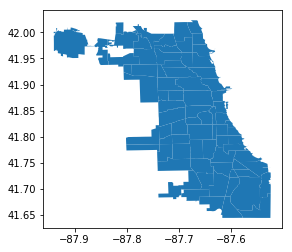

In [18]:
#%matplotlib inline #tells matplotlib to print to Jupyter
chicago_bnb.plot()

DOUGLAS


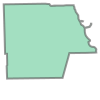

In [16]:
print(chicago_bnb['community'][0])
chicago_bnb['geometry'][0]

In [20]:
chicago_bnb['geometry'][0:10]

0    POLYGON ((-87.60914087617012 41.84469250346108...
1    POLYGON ((-87.592152838785 41.81692934706861, ...
2    POLYGON ((-87.62879823732874 41.80189303448802...
3    POLYGON ((-87.60670812560372 41.81681377137391...
4    POLYGON ((-87.592152838785 41.81692934706861, ...
5    POLYGON ((-87.6744075677953 41.9761034052494, ...
6    POLYGON ((-87.60603749216133 41.78587406578995...
7    POLYGON ((-87.58037662084516 41.80252502285027...
8    POLYGON ((-87.57714456890433 41.78614641093024...
9    POLYGON ((-87.65455590024236 41.99816615053949...
Name: geometry, dtype: object

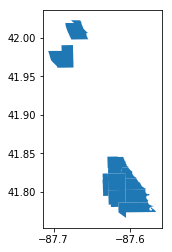

In [21]:
chicago_bnb['geometry'][0:10].plot()

## Chloropleth Map
The histogram of maps

In [22]:
# columns that could be mapped
print(chicago_bnb.columns.values)

['community' 'shape_area' 'shape_len' 'AREAID' 'response_r' 'accept_r'
 'rev_rating' 'price_pp' 'room_type' 'num_spots' 'poverty' 'crowded'
 'dependency' 'without_hs' 'unemployed' 'income_pc' 'harship_in'
 'num_crimes' 'num_theft' 'population' 'geometry']


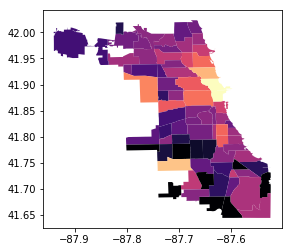

In [26]:
chicago_bnb.plot(column='price_pp', cmap='magma')

***Wait, where is the legend?***

In [28]:
########## HACK ############ 
# adapted from https://stackoverflow.com/questions/36008648/colorbar-on-geopandas
## add a color bar
## colormap options: https://matplotlib.org/users/colormaps.html
from matplotlib import pyplot as plt

# add colorbar that is normalized vmin to vmax
def add_color_bar(map_object, variable_column, cmap_string):
    vmin, vmax = variable_column.min(),  variable_column.min(),
    fig = map_object.get_figure()
    cax = fig.add_axes()
    sm = plt.cm.ScalarMappable(cmap=cmap_string, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    # fake up the array of the scalar mappable
    sm._A = []
    fig.colorbar(sm, cax=cax)

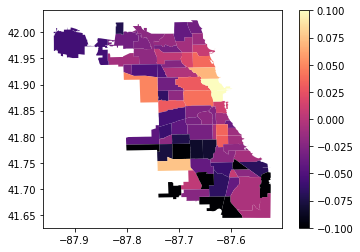

In [29]:
chic_price_pp = chicago_bnb.plot(column='price_pp', cmap='magma')
add_color_bar(chic_price_pp, chicago_bnb['price_pp'], 'magma')

# Scatterplots

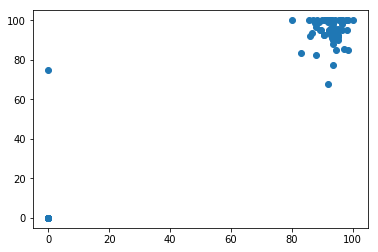

In [31]:
plt.scatter(x=chicago_bnb['rev_rating'], y=chicago_bnb['response_r'])

# Comparing Multiple Scatteplots with Seaborn
The goal is to identify interesting relationships that could guide exploratory mapping.

In [30]:
import seaborn as sns

In [36]:
list(chicago_bnb.columns.values)

['community',
 'shape_area',
 'shape_len',
 'AREAID',
 'response_r',
 'accept_r',
 'rev_rating',
 'price_pp',
 'room_type',
 'num_spots',
 'poverty',
 'crowded',
 'dependency',
 'without_hs',
 'unemployed',
 'income_pc',
 'harship_in',
 'num_crimes',
 'num_theft',
 'population',
 'geometry']

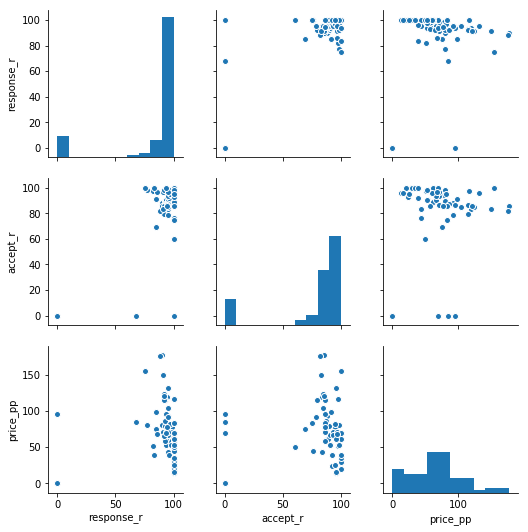

In [33]:
sns.pairplot(chicago_bnb[['response_r','accept_r', 'price_pp']])

## Rate Mapping

Raw numbers are incomparable across jurisdictions; to say that there were 100 homicides in one US county and 10 in another makes it seem like there were a lot in county with 100, until this is converting into a rate by placing total population in the denomentator.

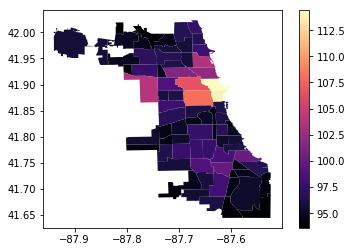

In [40]:
num_thefts_map = chicago_bnb.plot(column='num_theft', cmap='magma')
add_color_bar(num_thefts_map, chicago_bnb['num_theft'], 'magma')

In [41]:
chicago_bnb['thefts_per_capita'] = chicago_bnb['num_theft']/chicago_bnb['population']

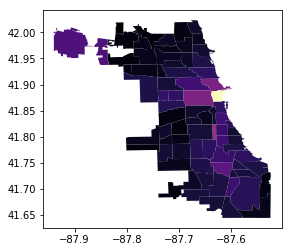

In [44]:
per_person_thefts_map = chicago_bnb.plot(column='thefts_per_capita', cmap='magma')
add_color_bar(num_thefts_map, chicago_bnb['thefts_per_capita'], 'magma')

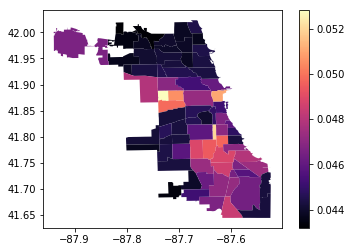

In [43]:
chicago_bnb['crimes_per_capita'] = chicago_bnb['num_crimes']/chicago_bnb['population']
num_crimes_map = chicago_bnb.plot(column='crimes_per_capita', cmap='magma')
add_color_bar(num_crimes_map, chicago_bnb['crimes_per_capita'], 'magma')

# Activity: Identify Three Potential Places in Chicago Where You Would Want to Stay
You and a friend are planning to head to Chicago on a budget. You want to identify the top three communities to look for an AirBnB in. You’ve been provided with a dataset to aid in you in your decision-making.

Utilize the basic ideas we explored related to mapping to:
1. Identify three potential communities where you would want to stay
2. Make a map with these three communities highlighted
3. **Challenge:** create a linear combination of variables to create an index score of where you would want to stay. For example, the value of community to you, $v(community)$, could be modeled as:

$ v(community) = weight_1 * norm(price_{pp}) + weight_2 * norm(accept_r) + ... + weight_n * norm(variable_n)$

Variables would need to be normalized, and subjective weights can be assigned based on what you personally value.


<a id='bda'></a>
# Basic Spatial Data Analysis

In [46]:
import pysal
import numpy as np

## Constructing spatial weights

There are three different types of spatial weights:
1. Contiguity Based Weights
2. Distance Based Weights
3. Kernel Weights

This demonstration only performs contiguity-based weights, namely queen and rook. Here is a [link](http://pysal.readthedocs.io/en/latest/users/tutorials/weights.html#pysal-spatial-weight-types) to the documentation with many more.

In [47]:
chicago_weights = pysal.weights.Rook.from_dataframe(chicago_bnb)

In [48]:
print("%.4f"%chicago_weights.pct_nonzero)

6.0381


In [49]:
chicago_Qweights = pysal.weights.Queen.from_dataframe(chicago_bnb)

In [50]:
print("%.4f"%chicago_Qweights.pct_nonzero)

6.6453


In [51]:
chicago_Qweights.weights

{0: [1.0, 1.0, 1.0, 1.0],
 1: [1.0, 1.0, 1.0],
 2: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 3: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0, 1.0],
 5: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 6: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 7: [1.0, 1.0, 1.0, 1.0],
 8: [1.0, 1.0, 1.0, 1.0],
 9: [1.0, 1.0],
 10: [1.0, 1.0, 1.0],
 11: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 12: [1.0, 1.0, 1.0, 1.0],
 13: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 14: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 15: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 16: [1.0, 1.0, 1.0, 1.0],
 17: [1.0, 1.0, 1.0],
 18: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 19: [1.0, 1.0, 1.0, 1.0],
 20: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 21: [1.0, 1.0, 1.0, 1.0],
 22: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 23: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 24: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 25: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 26: [1.0, 1.0, 1.0, 1.0],
 27: [1.0, 1.0, 1.0, 1.0, 1.0],
 28: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 29: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 30: [1.0,

In [52]:
help(chicago_Qweights)

Help on Queen in module pysal.weights.Contiguity object:

class Queen(pysal.weights.weights.W)
 |  Spatial weights.
 |  
 |  Parameters
 |  ----------
 |  neighbors       : dictionary
 |                    key is region ID, value is a list of neighbor IDS
 |                    Example:  {'a':['b'],'b':['a','c'],'c':['b']}
 |  weights : dictionary
 |                    key is region ID, value is a list of edge weights
 |                    If not supplied all edge weights are assumed to have a weight of 1.
 |                    Example: {'a':[0.5],'b':[0.5,1.5],'c':[1.5]}
 |  id_order : list
 |                    An ordered list of ids, defines the order of
 |                    observations when iterating over W if not set,
 |                    lexicographical ordering is used to iterate and the
 |                    id_order_set property will return False.  This can be
 |                    set after creation by setting the 'id_order' property.
 |  silent_island_warning   : boolean
 

## Moran's I

In [53]:
y=chicago_bnb['price_pp']
w=chicago_Qweights
chicago_Qweights_moran = pysal.Moran(y, w, two_tailed=False)

In [54]:
"%.3f"%chicago_Qweights_moran.I

'0.320'

In [57]:
"%.8f"%chicago_Qweights_moran.p_norm

'0.00000179'

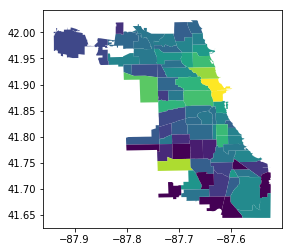

In [59]:
chicago_bnb.plot(column='price_pp')

# Activity
Utilize the basic ideas we explored related to spatial autocorrelation to:
1. Test spatial autocorrelation across multiple variables and weights
2. Which variable is the most spatially autocorrelated?
3. Do you have any hunches as to why there is or isn’t spatial autocorrelation in different variables?
